In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [24]:
# Load the dataset
df = pd.read_csv('heart_attack_risk_dataset.csv')

In [25]:
df.sample(5)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
36706,44,Female,0,0,Moderate,28.92,1,0,162.7,121,100,0,Moderate,Asymptomatic,Reversible defect,1,Left Ventricular Hypertrophy,1,186,Low
33647,53,Male,0,1,Moderate,24.06,0,1,226.9,93,85,0,Low,Non-anginal,Reversible defect,1,Left Ventricular Hypertrophy,0,143,Low
8110,46,Female,1,0,Low,22.21,0,0,225.3,111,86,0,Low,Atypical,Reversible defect,0,Left Ventricular Hypertrophy,0,141,Low
15195,57,Female,1,1,High,29.85,0,1,286.5,158,101,0,Moderate,Atypical,Reversible defect,0,ST-T abnormality,0,150,Low
3998,74,Female,0,0,High,23.41,0,1,250.9,100,117,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,188,Moderate


In [26]:
# Separate features and target
X = df.drop('Heart_Attack_Risk', axis=1)
y = df['Heart_Attack_Risk']

In [27]:
# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Initialize and train the SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [31]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)

In [32]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.51


In [33]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00      1987
         Low       0.51      1.00      0.67      5083
    Moderate       0.00      0.00      0.00      2930

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
confusion_matrix(y_test,y_pred)

array([[   0, 1987,    0],
       [   0, 5083,    0],
       [   0, 2930,    0]])

In [35]:
from sklearn.model_selection import learning_curve

# Generate learning curve data with optimized parameters
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train_scaled, y_train,  # Using a subset of data
    cv=3, scoring='accuracy',  # Reduce cross-validation folds to 3
    train_sizes=np.linspace(0.1, 1.0, 5),  # Reduce the number of training sizes
    n_jobs=-1  # Utilize all available processors
)

In [36]:
# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

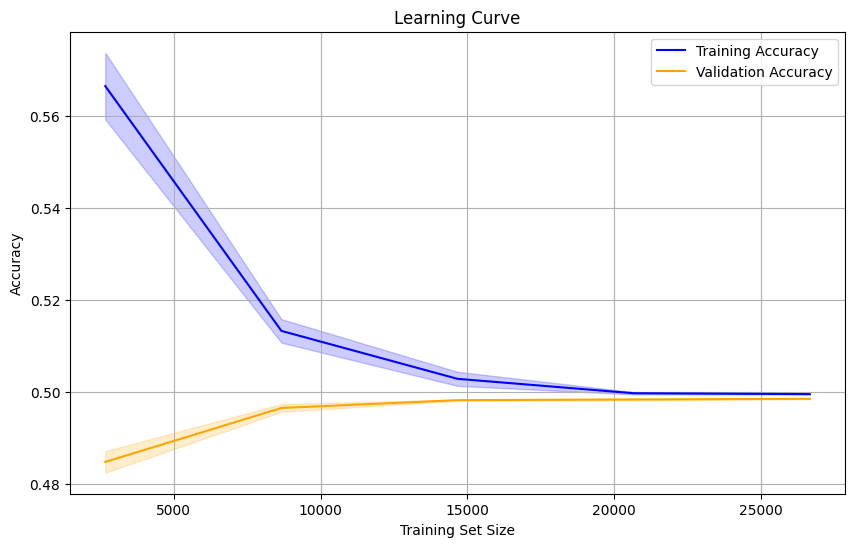

In [37]:
# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()